In [1]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
#import pandas_profiling as pp   # simple and fast exploratory data analysis of a Pandas Datafram

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.5f' % x) # scientific number to number


## Importing Data

In [2]:
# Read-in the dataset
Insurance_Data = pd.read_csv(r'carInsurance_data.csv')
print('Train Data Shape - ', Insurance_Data.shape)
Insurance_Data.head()

Train Data Shape -  (4000, 19)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


We have 4000 customers of data with 19 columns to train the model and 1000 customers to test our model on. Here we will use the train and test data differently to train and test the model.

### Lets check the data type

In [3]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

## Lets Generate a Data Profiling Report

pp.ProfileReport(Insurance_Data)

# EDA

### Let's check the summary fo data 

In [4]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000
mean,2000.50000,41.21475,0.01450,1532.93725,0.49275,0.13300,15.72125,2.60725,48.70650,0.71750,0.40100
std,1154.84487,11.55019,0.11955,3511.45249,0.50001,0.33962,8.42531,3.06420,106.68538,2.07865,0.49016
min,1.00000,18.00000,0.00000,-3058.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,0.00000,0.00000
25%,1000.75000,32.00000,0.00000,111.00000,0.00000,0.00000,8.00000,1.00000,-1.00000,0.00000,0.00000
50%,2000.50000,39.00000,0.00000,551.50000,0.00000,0.00000,16.00000,2.00000,-1.00000,0.00000,0.00000
75%,3000.25000,49.00000,0.00000,1619.00000,1.00000,0.00000,22.00000,3.00000,-1.00000,0.00000,1.00000
max,4000.00000,95.00000,1.00000,98417.00000,1.00000,1.00000,31.00000,43.00000,854.00000,58.00000,1.00000


In [5]:
# This is how we can get summary for the categorical data
Insurance_Data.describe(include=np.object) 

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


### Univariate Analysis

**Lets analyse the data w.r.t our Target variable**

In [6]:
Target = 'CarInsurance'
pd.crosstab(Insurance_Data[Target], columns='N', normalize=True) # normalize=True means calculate %

col_0,N
CarInsurance,
0,0.59900
1,0.40100


**The data seems to be quiet good as we have approx. 40% of 1's in our data**

# Visualising Data - Bivariate Analysis

In [7]:
# Lets drop columns which we will not use
num_cols = Insurance_Data.drop(['Id', 'CarInsurance'],axis=1).select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.drop(['CallStart', 'CallEnd'],axis=1).select_dtypes(exclude=[np.number]).columns.tolist()


In [8]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
Non-Numeric Columns 
 ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


In [9]:
pd.crosstab(Insurance_Data.CarLoan,Insurance_Data[Target])

CarInsurance,0,1
CarLoan,,
0,2016,1452
1,380,152


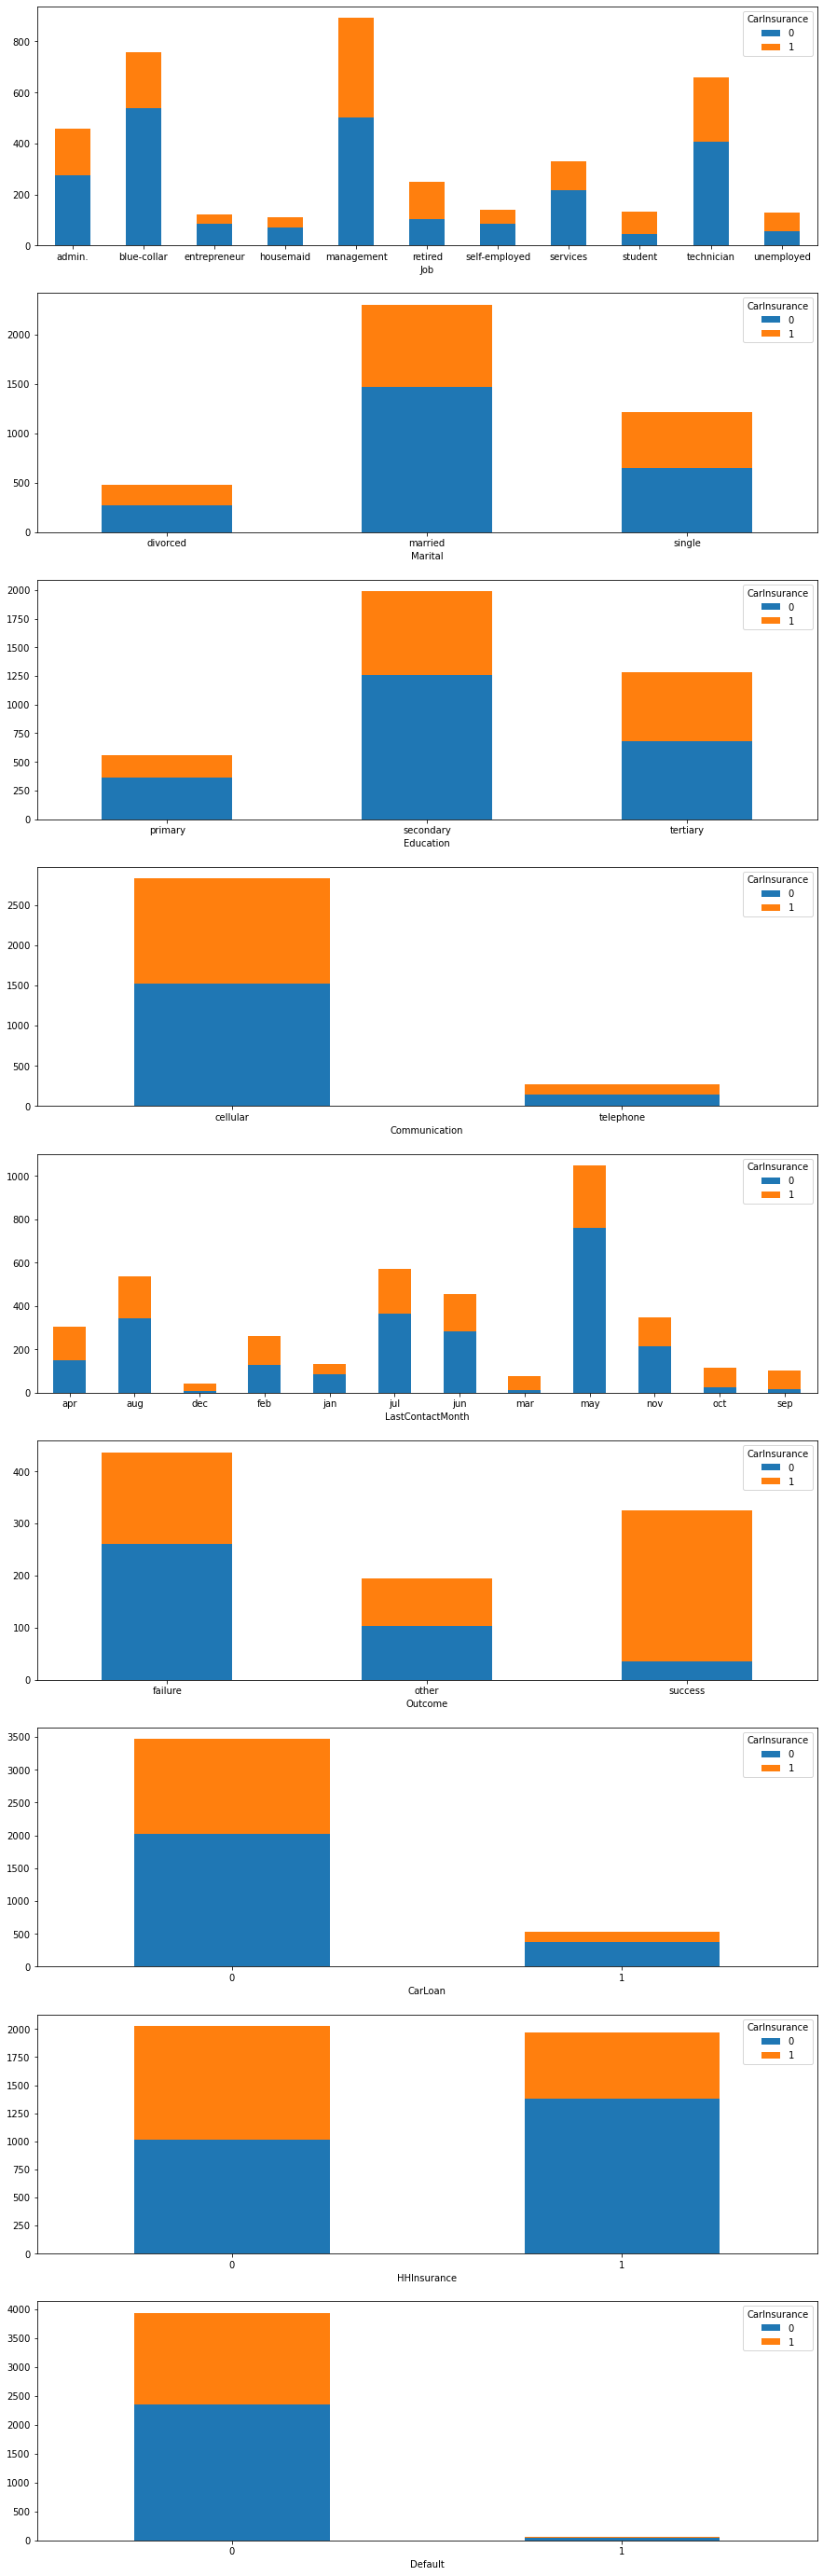

In [10]:
non_num_cols_viz = non_num_cols+['CarLoan', 'HHInsurance', 'Default']
fig, axes = plt.subplots(len(non_num_cols_viz), figsize=(15,50))
for i in range(len(non_num_cols_viz)):
    pd.crosstab(Insurance_Data[non_num_cols_viz[i]], Insurance_Data[Target]).plot(kind='bar', 
                                                                                  stacked=True, 
                                                                                  ax=axes[i],
   # sharex=False every plot should have different axis ax=axes[i],
                                                                                  rot=0)
    # rot =0 is to get label in proper readable format Horizontal
        

* Mar is better in term of Sales with ratio comparision

* May was better in term of Connection with Customer & highest count of sales in a Year

* The JobType='Retired' seem to have higher chance of buying insurance
* The Communication='cellular' seem to best way to reach out for insurance

## Identity & Treatment of Missing Values

In [11]:
Insurance_Data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

**Looks like variables Job, Education, Communication & Outcome have missing values. Lets analyse them and treat them accordingly**

# Missing Values - Job

In [12]:
Insurance_Data_Org = Insurance_Data.copy()

## Job  

In [13]:
Insurance_Data['Job'].value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
NaN               19
Name: Job, dtype: int64

Lets replace the missing with None. This will help us in handling missing values in future as well.

In [14]:
Insurance_Data['Job'] = Insurance_Data['Job'].fillna('None') # random or others 
Insurance_Data['Job'].isnull().sum()

0

## communication

In [15]:
# Fill missing communication with none 
Insurance_Data['Communication'].value_counts(dropna=False)

cellular     2831
NaN           902
telephone     267
Name: Communication, dtype: int64

In [16]:
Insurance_Data['Communication'] = Insurance_Data['Communication'].fillna('None')
Insurance_Data['Communication'].isnull().sum()

0

## Outcome

In [17]:
# Check for missing value in Outcome
Insurance_Data['Outcome'].value_counts(dropna=False)

NaN        3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [18]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1
# Can you do it other ways.. yes this is one way of doing you can do it other ways also.

Insurance_Data.loc[Insurance_Data['DaysPassed']==-1,'Outcome']='NoPrev'
Insurance_Data['Outcome'].value_counts(dropna=False)


NoPrev     3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

## Education

In [19]:
Insurance_Data['Job'].value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'None'],
      dtype='object')

In [20]:
# Create job-education level mode mapping
edu_mode=[]  # empty list 

# What are different Job Types
job_types = Insurance_Data.Job.value_counts().index

# Checking which job is most 
Insurance_Data['Education'].value_counts()

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [21]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'None'],
      dtype='object')

In [22]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.
# It means when there are many people in the managment job then most of them are in which education.
# We can find that in below mapping


# nlargest(1) select only one level which is highest count level in education 
for i in job_types:  # i = management
    mode = Insurance_Data[Insurance_Data.Job==i]['Education'].value_counts().nlargest(1).index  # tertiary 
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=job_types)

edu_map

# basic model calculation

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [23]:
# Fill missing communication with none 
Insurance_Data['Education'].value_counts(dropna=False)

secondary    1988
tertiary     1282
primary       561
NaN           169
Name: Education, dtype: int64

### Replacing with mode

In [24]:
# Apply the mapping to missing eductaion obs. We will replace education now by jobs value
#  for none 
for j in job_types:  # j=management
    Insurance_Data.loc[(Insurance_Data['Education'].isnull()) & (Insurance_Data['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

# For those who are not getting mapped we will create a new category as None
Insurance_Data['Education'].fillna('None',inplace=True)

In [25]:
# Fill missing communication with none 
Insurance_Data['Education'].value_counts(dropna=False)

secondary    2117
tertiary     1318
primary       565
Name: Education, dtype: int64

In [26]:
# Check if we have any missing values left
Insurance_Data.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

# Subset of data

* number subset 
* Categorical subset

In [27]:
Insurance_Data_num = Insurance_Data[num_cols+['Id', 'CarInsurance']]
Insurance_Data_num.head(3)

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Id,CarInsurance
0,32,0,1218,1,0,28,2,-1,0,1,0
1,32,0,1156,1,0,26,5,-1,0,2,0
2,29,0,637,1,0,3,1,119,1,3,1


In [28]:
# Categorical columns data
Insurance_Data_cat = Insurance_Data[non_num_cols]
Insurance_Data_cat.head(3)

,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,management,single,tertiary,telephone,jan,NoPrev
1,blue-collar,married,primary,None,may,NoPrev
2,management,single,tertiary,cellular,jun,failure


In [40]:
from sklearn.preprocessing import LabelEncoder
Insurance_Data_cat_dummies = Insurance_Data_cat.apply(LabelEncoder().fit_transform)
Insurance_Data_cat_dummies.head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,5,2,2,2,4,0
1,2,1,0,0,8,0
2,5,2,2,1,6,1
3,9,2,0,1,8,0
4,5,1,2,1,6,0


## Merge the 2 File (number & Categorical)

In [41]:
Insurance_Data_final = pd.concat([Insurance_Data_num, Insurance_Data_cat_dummies], axis=1)
print(Insurance_Data_final.shape)
Insurance_Data_final.head()

(4000, 17)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Id,CarInsurance,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,32,0,1218,1,0,28,2,-1,0,1,0,5,2,2,2,4,0
1,32,0,1156,1,0,26,5,-1,0,2,0,2,1,0,0,8,0
2,29,0,637,1,0,3,1,119,1,3,1,5,2,2,1,6,1
3,25,0,373,1,0,11,2,-1,0,4,1,9,2,0,1,8,0
4,30,0,2694,0,0,3,1,-1,0,5,0,5,1,2,1,6,0


In [42]:
# Checking if there are missing values before we run model
Insurance_Data_final.isnull().sum(axis = 0)

Age                 0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
LastContactDay      0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Id                  0
CarInsurance        0
Job                 0
Marital             0
Education           0
Communication       0
LastContactMonth    0
Outcome             0
dtype: int64

## Data Partition

In [65]:
X = Insurance_Data_final.drop(['Id', 'CarInsurance'], axis=1)
Y = Insurance_Data_final['CarInsurance']

#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=15)

In [66]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 15)
Test shape  -  (1200, 15)


## Model Building

In [67]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,CarInsurance,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job,Marital,Education,Communication,LastContactMonth,Outcome
1095,0,42,0,50,0,0,5,1,-1,0,5,2,1,0,8,0
1668,0,33,0,148,0,0,20,1,-1,0,5,1,2,0,8,0
1407,0,56,0,314,1,1,5,1,-1,0,10,1,0,0,6,0
355,0,40,0,1101,1,0,16,1,-1,0,2,2,1,0,8,0
1634,1,49,0,228,1,0,2,1,92,1,1,2,2,1,6,3


In [69]:
features = list(train.columns[1:])
features

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome']

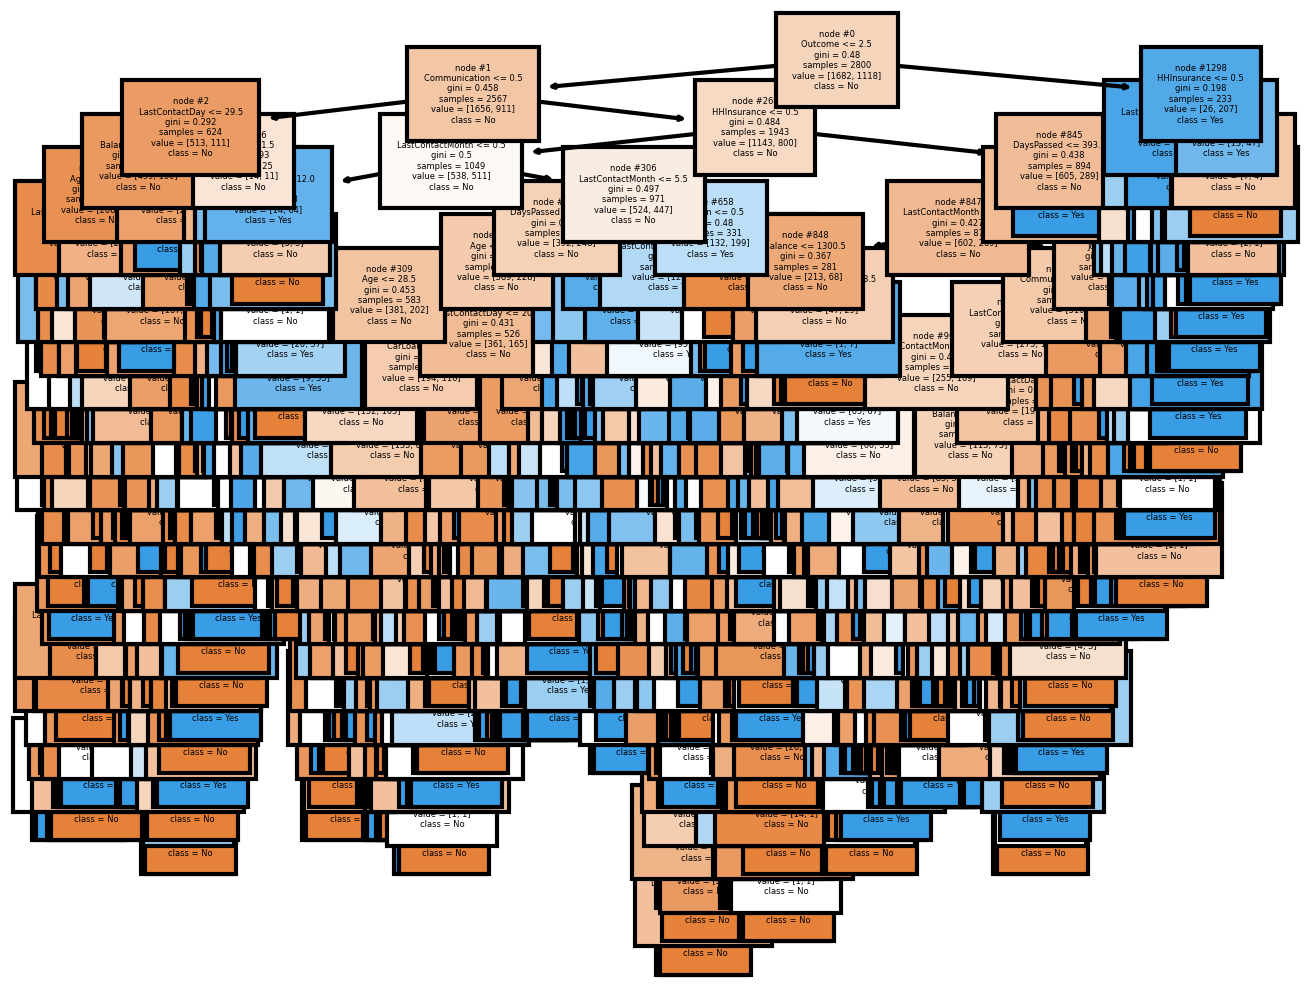

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt

CarInsurance=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = features,  # column name
               class_names=CarInsurance, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [71]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,CarInsurance,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job,Marital,Education,Communication,LastContactMonth,Outcome,Predicted
1095,0,42,0,50,0,0,5,1,-1,0,5,2,1,0,8,0,0
1668,0,33,0,148,0,0,20,1,-1,0,5,1,2,0,8,0,0
1407,0,56,0,314,1,1,5,1,-1,0,10,1,0,0,6,0,0
355,0,40,0,1101,1,0,16,1,-1,0,2,2,1,0,8,0,0
1634,1,49,0,228,1,0,2,1,92,1,1,2,2,1,6,3,1


In [72]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['CarInsurance'])
print(matrix)

[[1682    0]
 [   0 1118]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(train['CarInsurance'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00      1118

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,300], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 300]},
             verbose=1)

In [75]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=70, min_samples_split=100,
                       random_state=42)

In [76]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=300, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=300)

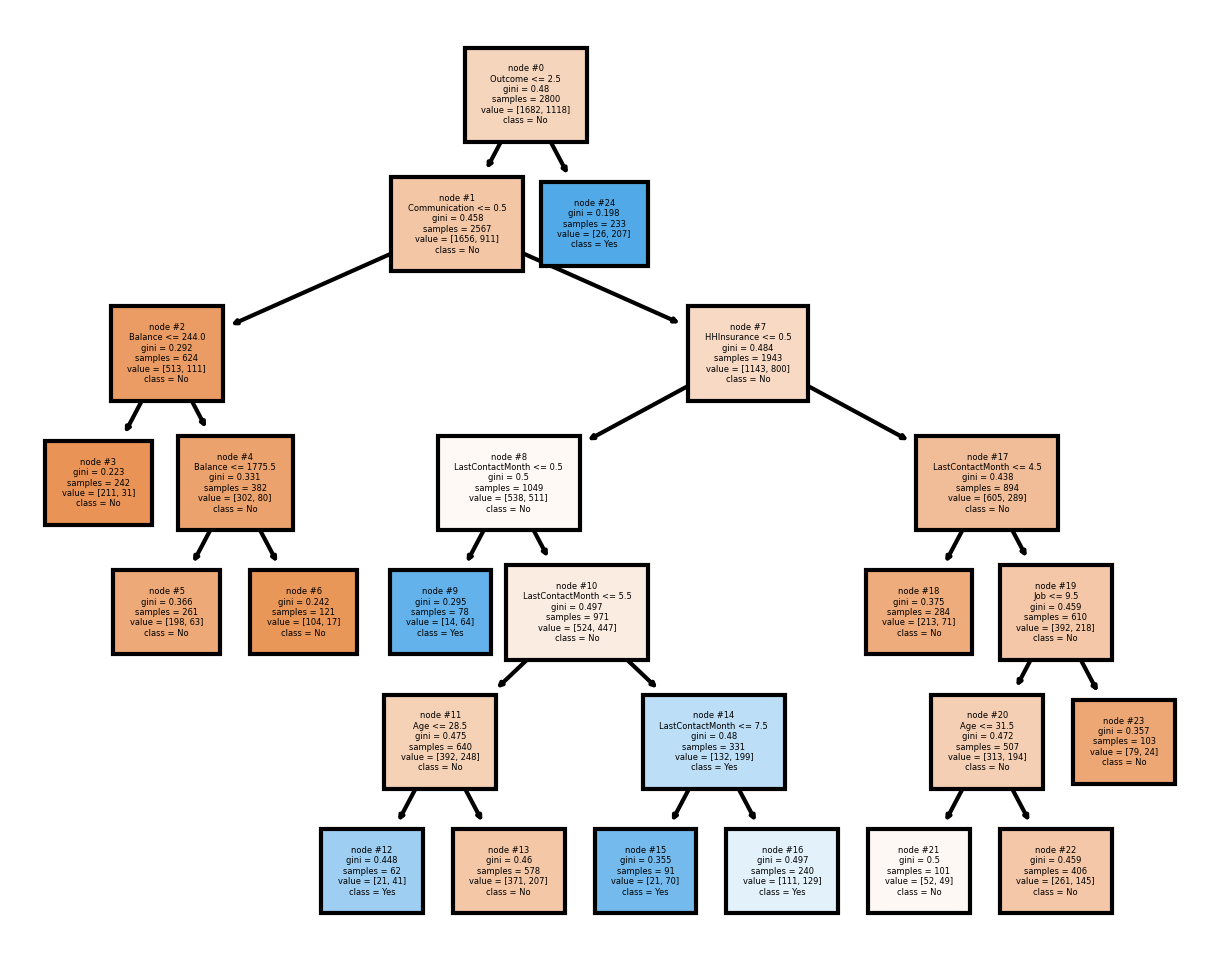

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt

CarInsurance=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = features,  # column name
               class_names=CarInsurance, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [78]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,CarInsurance,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job,Marital,Education,Communication,LastContactMonth,Outcome,Predicted
1095,0,42,0,50,0,0,5,1,-1,0,5,2,1,0,8,0,0
1668,0,33,0,148,0,0,20,1,-1,0,5,1,2,0,8,0,0
1407,0,56,0,314,1,1,5,1,-1,0,10,1,0,0,6,0,0
355,0,40,0,1101,1,0,16,1,-1,0,2,2,1,0,8,0,0
1634,1,49,0,228,1,0,2,1,92,1,1,2,2,1,6,3,1


In [79]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['CarInsurance'])
print(matrix)

[[1489  607]
 [ 193  511]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(train['CarInsurance'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1682
           1       0.73      0.46      0.56      1118

    accuracy                           0.71      2800
   macro avg       0.72      0.67      0.67      2800
weighted avg       0.72      0.71      0.70      2800

